<a href="https://colab.research.google.com/github/nemoware/analyser/blob/document-parser-lib/notebooks/dev_GPN_subsidiaries_names.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import re, json
from pprint import pprint
from bson import json_util

import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [0]:
_legal_entity_types_of_subsidiaries = ['АО', 'ООО', 'ТОО', 'ИООО', 'ЗАО', 'НИС а.о.']

def normalize_company_name(name: str) -> (str, str):
  legal_entity_type = ''
  normal_name = name
  for c in _legal_entity_types_of_subsidiaries:
    if name.strip().startswith(c):
      legal_entity_type = c
      normal_name = name[len(c):]

  normal_name = normal_name.strip()
  normal_name = re.sub(r'\s+', ' ', normal_name)
  normal_name = re.sub(r'[\s ]*[-–v][\s ]*', '-', normal_name)
  normal_name = re.sub(r'["\'«»]', '', normal_name)
  return legal_entity_type, normal_name


a, b = normalize_company_name("ООО \"Газпромнефть-  Трейд  Оренбург\"")
assert 'ООО'== a
assert 'Газпромнефть-Трейд Оренбург' == b

In [3]:
!wget https://raw.githubusercontent.com/nemoware/gpn-analyse-ui/create_audit/projects/server/json/initialData.json

--2019-10-04 01:43:06--  https://raw.githubusercontent.com/nemoware/gpn-analyse-ui/create_audit/projects/server/json/initialData.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7953 (7.8K) [text/plain]
Saving to: ‘initialData.json’

initialData.json    100%[===================>]   7.77K  --.-KB/s    in 0s      

2019-10-04 01:43:06 (125 MB/s) - ‘initialData.json’ saved [7953/7953]



In [4]:


def convert_initialData( jfile):
  
  forms = []

  converted={}
  result = {'Subsidiary': converted}
  with open(jfile, 'r', encoding='utf8') as handle:
    subsidiaries = json.load(handle)['Subsidiary']

  for s in subsidiaries:
    legal_entity_type, name = normalize_company_name(s['name'])
    if not legal_entity_type in forms:
      forms.append(legal_entity_type)
    converted[name]={
      '_id': name,
      'legal_entity_type':legal_entity_type,
      'aliases':[name]      
    }

  return result

_dta = list(convert_initialData( 'initialData.json')['Subsidiary'].values())
_insert = {'Subsidiary':_dta}
_insert = json.dumps(_insert, indent=2, ensure_ascii=False, default=json_util.default)

print(_insert)

{
  "Subsidiary": [
    {
      "_id": "Арктика Медиа",
      "legal_entity_type": "АО",
      "aliases": [
        "Арктика Медиа"
      ]
    },
    {
      "_id": "ИПП Мастерская печати",
      "legal_entity_type": "ООО",
      "aliases": [
        "ИПП Мастерская печати"
      ]
    },
    {
      "_id": "РИА Город",
      "legal_entity_type": "ООО",
      "aliases": [
        "РИА Город"
      ]
    },
    {
      "_id": "Газпромнефть-Аэро",
      "legal_entity_type": "АО",
      "aliases": [
        "Газпромнефть-Аэро"
      ]
    },
    {
      "_id": "Газпромнефть Марин Бункер",
      "legal_entity_type": "ООО",
      "aliases": [
        "Газпромнефть Марин Бункер"
      ]
    },
    {
      "_id": "Газпромнефть-Битум Казахстан",
      "legal_entity_type": "ТОО",
      "aliases": [
        "Газпромнефть-Битум Казахстан"
      ]
    },
    {
      "_id": "Совхимтех",
      "legal_entity_type": "АО",
      "aliases": [
        "Совхимтех"
      ]
    },
    {
      "_id": "Газпр

In [5]:
for company in convert_initialData('initialData.json')['Subsidiary'].values():
  print(company['legal_entity_type'],'\t', company['_id'])

АО 	 Арктика Медиа
ООО 	 ИПП Мастерская печати
ООО 	 РИА Город
АО 	 Газпромнефть-Аэро
ООО 	 Газпромнефть Марин Бункер
ТОО 	 Газпромнефть-Битум Казахстан
АО 	 Совхимтех
ООО 	 Газпромнефть-СМ
 	 Газпромнефть Лубрикантс Италия
ООО 	 Газпромнефть Лубрикантс Украина
АО 	 Газпромнефть-ОНПЗ
ООО 	 Газпромнефть-Каталитические системы
ООО 	 Газпромнефть-Энергосервис
ООО 	 Газпромнефть-Логистика
ООО 	 Газпромнефть-Битумные материалы
ООО 	 Газпромнефть-Рязанский завод битумных материалов
ООО 	 Газпромнефть-Тоталь ПМБ
ООО 	 НОВА-БРИТ
ООО 	 Транс-Реал
АО 	 Газпромнефть-МНПЗ
ООО 	 Нефтехимремонт
ООО 	 РМЗ ГПН-ОНПЗ
ООО 	 Альянс-Ойл-Азия
ООО 	 Моснефтепродукт
ООО 	 Битумные Терминалы
ООО 	 БСВ-ХИМ
ООО 	 Полиэфир
АО 	 МЗСМ
ООО 	 ИТСК
ООО 	 Ноябрьскнефтегазсвязь
ООО 	 Комплекс Галерная 5
ООО 	 Юнифэл
АО 	 МФК Лахта Центр
ООО 	 ГПН-Инвест
ООО 	 ГПН-ЗС
ООО 	 Алтайское Подворье
ООО 	 ГПН-Финанс
ООО 	 ГПН-Энерго
ООО 	 Газпромнефть-Трейд Оренбург
ООО 	 ГПН-проект
ООО 	 Клуб Заречье
ООО 	 Газпромнефть-Оренбург

## Поиск наиболее близкого наименнования

In [6]:
!pip install pyjarowinkler

In [7]:
from pyjarowinkler import distance

def compare_masked_strings(a, b, masked_substrings):
  a1=a
  b1=b
  for masked in masked_substrings:
    if a1.find(masked)>=0 and b1.find(masked)>=0:
      a1=a1.replace(masked, '')
      b1=b1.replace(masked, '')

  # print(a1, '--', b1)
  return distance.get_jaro_distance(a1, b1, winkler=True, scaling=0.1)

# print (distance.get_jaro_distance("ИТСК", "ИВСК", winkler=True, scaling=0.1))
print ('jaro', distance.get_jaro_distance("Газпромнефть-ОНПЗ", "Газпромнефть-МНПЗ", winkler=True, scaling=0.1))
print ('masked',compare_masked_strings("Газпромнефть-ОНПЗ", "Газпромнефть-МНПЗ" , masked_substrings=['Газпромнефть']))

jaro 0.98
masked 0.88


In [0]:
def find_closest_org_name(subsidiaries, pattern, threshold=0.85, masked_substrings=['Газпромнефть']):
  best_similarity = 0
  for s in subsidiaries:
    for alias in s['aliases']:
      similarity = compare_masked_strings(pattern, alias, masked_substrings)
      if similarity > best_similarity:
        best_similarity = similarity
        finding = s
  return finding, best_similarity



In [10]:
subsidiaries = list(convert_initialData('initialData.json')['Subsidiary'].values())
subsidiaries = sorted(subsidiaries, key=lambda b: b['_id'])

print(find_closest_org_name(subsidiaries, 'Газпромнефть-Безальтернативное топливо'))
print(find_closest_org_name(subsidiaries, 'Газпромнефть - альтернативное топливо'))
print(find_closest_org_name(subsidiaries, 'Газпромнефть -- Альтернативное топливо'))
print(find_closest_org_name(subsidiaries, 'Газпромнефть-ОНПЭЗЭ'))
print(find_closest_org_name(subsidiaries, 'ОктябрьскНефтеГазАвтоматика'))
print(find_closest_org_name(subsidiaries, 'Мунаймырза'))

({'_id': 'Газпромнефть-Альтернативное топливо', 'legal_entity_type': 'АО', 'aliases': ['Газпромнефть-Альтернативное топливо']}, 0.87)
({'_id': 'Газпромнефть-Альтернативное топливо', 'legal_entity_type': 'АО', 'aliases': ['Газпромнефть-Альтернативное топливо']}, 0.97)
({'_id': 'Газпромнефть-Альтернативное топливо', 'legal_entity_type': 'АО', 'aliases': ['Газпромнефть-Альтернативное топливо']}, 0.96)
({'_id': 'Газпромнефть-ОНПЗ', 'legal_entity_type': 'АО', 'aliases': ['Газпромнефть-ОНПЗ']}, 0.94)
({'_id': 'НоябрьскНефтеГазАвтоматика', 'legal_entity_type': 'ООО', 'aliases': ['НоябрьскНефтеГазАвтоматика']}, 0.82)
({'_id': 'Мунай-Мырза', 'legal_entity_type': 'ЗАО', 'aliases': ['Мунай-Мырза']}, 0.98)


In [11]:



def plot_similarity(matrix, rotation):  
  sns.set(font_scale=1.0)
  g = sns.heatmap(
      matrix,
      vmin=matrix.min(),
      vmax=matrix.max(),
      annot=False, 
      cmap="GnBu" #"YlOrRd"
  )
  

max_similarity = 0
K = len(subsidiaries)
mtx = np.zeros(shape=(K,K)) 
a=''
b=''
print('COLLISIONS:')
for x in range(K):
  subx = subsidiaries[x]['_id']
  for y in range(K):
    suby = subsidiaries[y]['_id']
    similarity = compare_masked_strings(subx , suby , ['Газпромнефть' ])
    mtx[x,y] = similarity

    if x!=y and similarity > max_similarity:
      a=subx
      b=suby
      max_similarity =similarity 
    if x!=y and similarity > 0.91:
      print (f'{subx} | {suby} | {similarity} ')

print('MAX:')
print(f'{a} | {b} | {max_similarity}')



COLLISIONS:
Газпромнефть-ННГ | Газпромнефть-ННГГФ | 0.93 
Газпромнефть-ННГГФ | Газпромнефть-ННГ | 0.93 
MAX:
Газпромнефть-ННГ | Газпромнефть-ННГГФ | 0.93


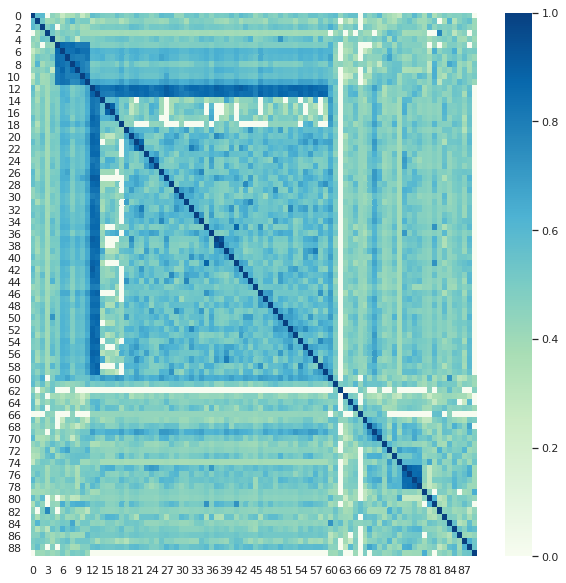

In [12]:
plt.figure('SUB-SUB similarity', figsize=(10,10))

plot_similarity( mtx, 90  )
 